# ♟️ Chess: The Winning Move 👑🏰 🏆

## Question:
#### ~~Based on opening move will white win or lose or draw ?~~
#### Predict the winners of a chess match model 

## Dataset :

Dataset downloaded from Kaggl. It cosist of 20,000+ records and 15 features. 
https://lichess.org/api

##### Data features:
* **Game ID**: System generated game ID.
* **Rated (T/F)**: Either the game is rated for points or casual
* **Start Time**: start time of the game
* **End Time**: end time of the game
* **Number of Turns**: number of turns the game took
* **Game Status**: game end status (mate, out of time, draw, resign)
* **Winner**: White, Black or Draw
* **Time Increment**:is a fixed amount of time (in minutes) assigned at move 0 for the entire game, and increment (in seconds) is the amount added after each move., more info [increment methods](https://en.wikipedia.org/wiki/Time_control#Compensation_.28delay_or_increment_methods.29)
* **White Player ID**:
* **White Player Rating**:
* **Black Player ID**:
* **Black Player Rating**:
* **Moves**: All Moves in Standard Chess Notation;
* **Opening Eco**: (Standardised Code for any given opening, [link](https://www.365chess.com/eco.php))
* **Opening Name**:
* **Opening Ply**: (Number of moves in the opening phase)

##  Step 0 : Import Libraries

In [331]:
# import the basic data points
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# checking and setting the theme for charts in project

sns.set_theme(style="darkgrid", palette="colorblind")

## Step 1 : Read Data

In [332]:
# Reding the data 
df = pd.read_csv('games.csv')

In [333]:
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1504210000000.000000,1504210000000.000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000.000000,1504130000000.000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


> We've got a lot of object features which requires preporcessing for our alghorithm to work ~

## Step 2 : Data Preprocessing / Cleaning

In [335]:
# Checking columns names
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

no cleaning required for column names ~~

In [336]:
#Check rows
#Check Nulls 
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

No null values~~ 

In [337]:
# Checking dupes
df.duplicated().sum()

429

In [338]:
#dropping those duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [339]:
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1504210000000.000000,1504210000000.000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000.000000,1504130000000.000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [340]:
# converting time unix formatted features to date time . 
df['created_at_dt'] = pd.to_datetime(df['created_at']/1000, unit='s', origin='unix')
df['last_move_at_dt'] = pd.to_datetime(df['last_move_at']/1000,unit='s',origin='unix')
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt
0,TZJHLljE,False,1504210000000.000000,1504210000000.000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,2017-08-31 20:06:40,2017-08-31 20:06:40


In [341]:
df['increment_code'].value_counts()

10+0      7563
15+0      1295
15+15      832
5+5        732
5+8        687
          ... 
10+35        1
14+5         1
90+120       1
11+7         1
14+15        1
Name: increment_code, Length: 400, dtype: int64

In [342]:
# creating new columns from increment code 
df['game_time'],df['increment'] = df['increment_code'].str.split('+').str[0].astype(int),df['increment_code'].str.split('+').str[1].astype(int)

In [343]:
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt,game_time,increment
0,TZJHLljE,False,1504210000000.000000,1504210000000.000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,2017-08-31 20:06:40,2017-08-31 20:06:40,15,2


In [344]:
# Converting the differnce between time to minutes to measure the length of a game.

df['time'] = df['last_move_at_dt'] - df['created_at_dt']
df['time'] = df['time'].dt.total_seconds().div(60).astype(int)

In [345]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,game_time,increment,time
count,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000
mean,1483720725232.589844,1483721594909.302246,60.458607,1596.090224,1588.324622,4.804422,13.818992,5.167100,14.207397
std,28093644152.719948,28093532529.260677,33.502852,290.165038,290.164447,2.792791,17.190250,14.069013,81.004513
min,1376771633173.000000,1376771863841.000000,1.000000,784.000000,789.000000,1.000000,0.000000,0.000000,0.000000
25%,1477530000000.000000,1477530000000.000000,37.000000,1400.000000,1393.000000,3.000000,10.000000,0.000000,0.000000
50%,1495830000000.000000,1495830000000.000000,55.000000,1567.000000,1562.000000,4.000000,10.000000,0.000000,3.000000
75%,1503107489689.000000,1503110000000.000000,79.000000,1791.000000,1783.000000,6.000000,15.000000,7.000000,13.000000
max,1504493143790.000000,1504493827262.000000,349.000000,2700.000000,2723.000000,28.000000,180.000000,180.000000,10097.000000


In [346]:
# create a new column of ratings variance between each player
df["rating_diff"] = (df["white_rating"] - df["black_rating"]).abs()

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19629 entries, 0 to 20057
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               19629 non-null  object        
 1   rated            19629 non-null  bool          
 2   created_at       19629 non-null  float64       
 3   last_move_at     19629 non-null  float64       
 4   turns            19629 non-null  int64         
 5   victory_status   19629 non-null  object        
 6   winner           19629 non-null  object        
 7   increment_code   19629 non-null  object        
 8   white_id         19629 non-null  object        
 9   white_rating     19629 non-null  int64         
 10  black_id         19629 non-null  object        
 11  black_rating     19629 non-null  int64         
 12  moves            19629 non-null  object        
 13  opening_eco      19629 non-null  object        
 14  opening_name     19629 non-null  objec

> So it seems we have expanded our features, to further procceed we will need to drop some features which are irrelevent to our analysis 

In [348]:
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt,game_time,increment,time,rating_diff
0,TZJHLljE,False,1504210000000.000000,1504210000000.000000,13,outoftime,white,15+2,bourgris,1500,...,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,2017-08-31 20:06:40,2017-08-31 20:06:40,15,2,0,309


In [349]:
df['opening_name'].value_counts()

Van't Kruijs Opening                                            363
Sicilian Defense                                                353
Sicilian Defense: Bowdler Attack                                294
French Defense: Knight Variation                                265
Scotch Game                                                     264
                                                               ... 
King's Pawn Game: Philidor Gambit                                 1
Benko Gambit Declined |  Main Line                                1
King's Indian Defense: Orthodox Variation |  Donner Defense       1
French Defense: Winawer Variation |  Retreat Variation            1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation      1
Name: opening_name, Length: 1477, dtype: int64

> we have 1477 names which we need to reduce some openings have tens of minor variations , we will consider the family opening name for this analysis~

In [350]:
# let's split the move name and concatante the first two words ~
df['opening_name'] = df['opening_name'].str.split(' ').str[0:2]
df['opening_name'] = df.opening_name.apply(lambda x: ' '.join([str(i).replace(':','') for i in x]))

In [351]:
df['opening_name'].value_counts()

Sicilian Defense       2582
French Defense         1378
Queen's Pawn           1346
Italian Game            953
King's Pawn             929
                       ... 
Valencia Opening          1
Australian Defense        1
Doery Defense             1
Global Opening            1
Pterodactyl Defense       1
Name: opening_name, Length: 119, dtype: int64

> Now we have only 119 Opening names down from 1477 names 

In [352]:
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt,game_time,increment,time,rating_diff
0,TZJHLljE,False,1504210000000.000000,1504210000000.000000,13,outoftime,white,15+2,bourgris,1500,...,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense,5,2017-08-31 20:06:40,2017-08-31 20:06:40,15,2,0,309
1,l1NXvwaE,True,1504130000000.000000,1504130000000.000000,16,resign,black,5+10,a-00,1322,...,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense,4,2017-08-30 21:53:20,2017-08-30 21:53:20,5,10,0,61


One last idea, we may want to create a column of the game level either (low , intermediate, high) depending on white and black rating average.

In [353]:
# first check the stats .
df[['white_rating','black_rating']].describe()['min':'max']

,white_rating,black_rating
min,784.000000,789.000000
25%,1400.000000,1393.000000
50%,1567.000000,1562.000000
75%,1791.000000,1783.000000
max,2700.000000,2723.000000


> I will consider the following both players average ratings:
>* less than 1200 the game is low tier, 
>* 1200 to 1800 mid tier,
>* 1800 to max top tier 

In [355]:
# create a list of our conditions
conditions = [
    ((df['white_rating']+df['black_rating']) / 2 < 1200),
    ((df['white_rating']+df['black_rating']) / 2 >= 1200) & ((df['white_rating']+df['black_rating']) / 2 <= 1800),
    ((df['white_rating']+df['black_rating']) / 2 > 1800)
    ]

# create a list of the values we want to assign for each condition
values = ['low', 'mid', 'top']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier'] = np.select(conditions, values)

# display updated DataFrame
df.tail()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt,game_time,increment,time,rating_diff,tier
20053,EfqH7VVH,True,1499790914342.000000,1499791236076.000000,24,resign,white,10+10,belcolt,1691,...,A80,Dutch Defense,2,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000,10,10,5,471,mid
20054,WSJDhbPl,True,1499698089760.000000,1499698833979.000000,82,mate,black,10+0,jamboger,1233,...,A41,Queen's Pawn,2,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064,10,0,12,37,mid
20055,yrAas0Kj,True,1499697877493.000000,1499698050327.000000,35,mate,white,10+0,jamboger,1219,...,D00,Queen's Pawn,3,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808,10,0,2,67,mid
20056,b0v4tRyF,True,1499696127019.000000,1499697073718.000000,109,resign,white,10+0,marcodisogno,1360,...,B07,Pirc Defense,4,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.717999872,10,0,15,133,mid
20057,N8G2JHGG,True,1499643152649.000000,1499643889348.000000,78,mate,black,10+0,jamboger,1235,...,D00,Queen's Pawn,3,2017-07-09 23:32:32.648999936,2017-07-09 23:44:49.348000000,10,0,12,104,mid


In [356]:
df['tier'].value_counts()

mid    14153
top     4332
low     1144
Name: tier, dtype: int64

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19629 entries, 0 to 20057
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               19629 non-null  object        
 1   rated            19629 non-null  bool          
 2   created_at       19629 non-null  float64       
 3   last_move_at     19629 non-null  float64       
 4   turns            19629 non-null  int64         
 5   victory_status   19629 non-null  object        
 6   winner           19629 non-null  object        
 7   increment_code   19629 non-null  object        
 8   white_id         19629 non-null  object        
 9   white_rating     19629 non-null  int64         
 10  black_id         19629 non-null  object        
 11  black_rating     19629 non-null  int64         
 12  moves            19629 non-null  object        
 13  opening_eco      19629 non-null  object        
 14  opening_name     19629 non-null  objec

#### Dropping Features 💣

From the data preview above I have decided the following to be dropped to speed up the process : <br>
* **ID** : for every game there is a unique ID , it does not effect the game in anyway it's for record purposes only
* **moves** : This will not taken into consideration for this part of the analysis , would be a perfect element for implementing Neural Networks Models. 
* **opening_eco** : opening_name is identical , having a duplicate feature would skew the results
* **created_at_dt and last_move_at_dt** are dropped because we are not doing any time series modeling and we extracted the length of the game~

In [358]:
df2 = df.drop(['id','created_at','last_move_at','created_at_dt','last_move_at_dt','increment_code','moves','opening_eco'],axis=1)

In [359]:
df2.tail(3)

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_name,opening_ply,game_time,increment,time,rating_diff,tier
20055,True,35,mate,white,jamboger,1219,schaaksmurf3,1286,Queen's Pawn,3,10,0,2,67,mid
20056,True,109,resign,white,marcodisogno,1360,jamboger,1227,Pirc Defense,4,10,0,15,133,mid
20057,True,78,mate,black,jamboger,1235,ffbob,1339,Queen's Pawn,3,10,0,12,104,mid


In [360]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19629 entries, 0 to 20057
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rated           19629 non-null  bool  
 1   turns           19629 non-null  int64 
 2   victory_status  19629 non-null  object
 3   winner          19629 non-null  object
 4   white_id        19629 non-null  object
 5   white_rating    19629 non-null  int64 
 6   black_id        19629 non-null  object
 7   black_rating    19629 non-null  int64 
 8   opening_name    19629 non-null  object
 9   opening_ply     19629 non-null  int64 
 10  game_time       19629 non-null  int32 
 11  increment       19629 non-null  int32 
 12  time            19629 non-null  int32 
 13  rating_diff     19629 non-null  int64 
 14  tier            19629 non-null  object
dtypes: bool(1), int32(3), int64(5), object(6)
memory usage: 2.0+ MB


## Step 3: Explorotory data analysis(EDA)

In [361]:
# target charactrestic .
print(df2['winner'].value_counts()/len(df2['winner'])*100)

white   49.885374
black   45.437873
draw     4.676754
Name: winner, dtype: float64


> Our Target is a multiclassifcation problem

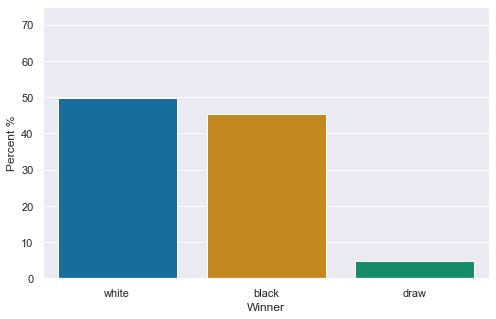

In [362]:
f, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='winner',y='rated',data=df2,estimator= lambda x: len(x) / len(df2) * 100)
ax.set(ylim=(0, 75), ylabel="Percent %",xlabel="Winner");

<AxesSubplot:xlabel='rated', ylabel='count'>

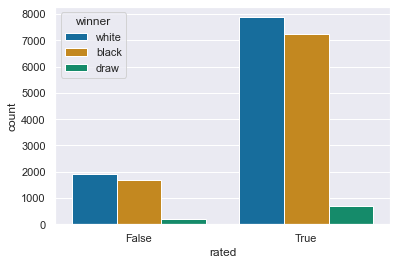

In [363]:
sns.countplot(x='rated',hue='winner',data=df2)

> We can infer from the chart that white has won more by a small amount in rated or un-rated matches

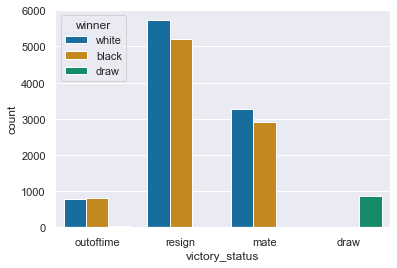

In [364]:
sns.countplot(x='victory_status',hue='winner',data=df2);

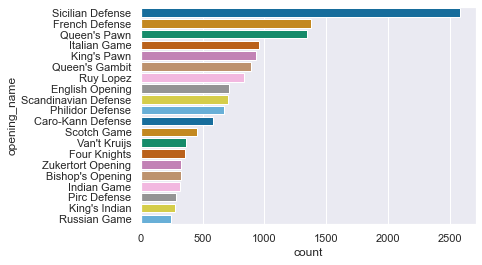

In [365]:
sns.countplot(y='opening_name',data=df2,order=pd.value_counts(df2['opening_name']).iloc[:20].index,palette="colorblind");

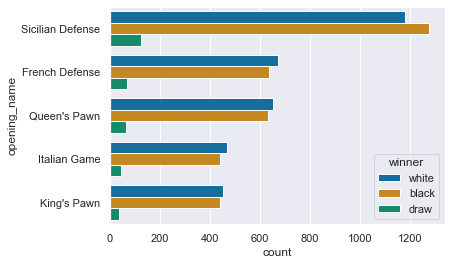

In [366]:
sns.countplot(y='opening_name',hue='winner',data=df2,order=pd.value_counts(df2['opening_name']).iloc[:5].index,palette="colorblind");

In [367]:
top_win_white = df2[df2['winner'] == 'white']

<AxesSubplot:xlabel='count', ylabel='white_id'>

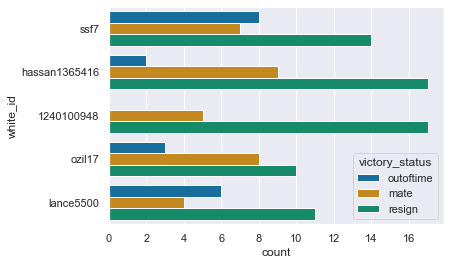

In [368]:
sns.countplot(data=top_win_white,y="white_id",hue="victory_status",order=pd.value_counts(top_win_white['white_id']).iloc[:5].index,palette="colorblind")

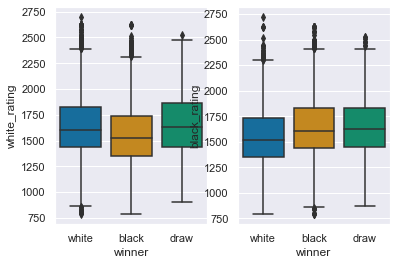

In [369]:
fig, axes = plt.subplots(1, 2)

#create chart in each subplot
sns.boxplot(data=df2,y='white_rating',x='winner', ax=axes[0])
sns.boxplot(data=df2,y='black_rating',x='winner', ax=axes[1]);

<AxesSubplot:xlabel='winner', ylabel='rating_diff'>

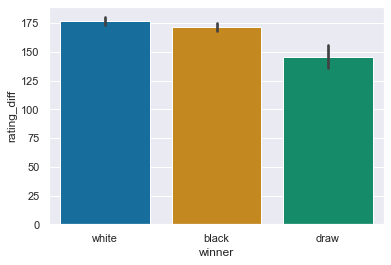

In [370]:
sns.barplot(x='winner',y='rating_diff',data=df2)

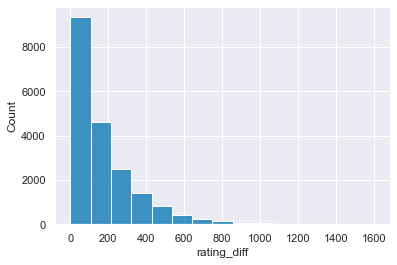

In [371]:
sns.histplot(x='rating_diff',data=df2,bins=15);

<AxesSubplot:xlabel='rating_diff', ylabel='turns'>

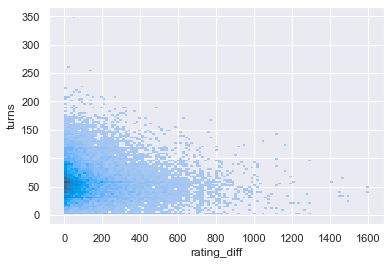

In [372]:
sns.histplot(x= df2['rating_diff'].abs(), y = "turns", data = df2,palette="colorblind")

<AxesSubplot:xlabel='tier', ylabel='game_time'>

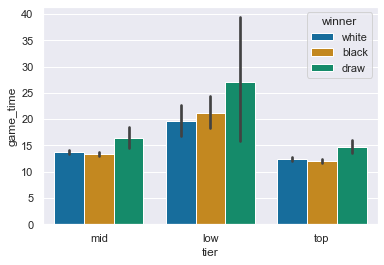

In [373]:
sns.barplot(y='game_time',x='tier',hue='winner',data=df2,palette="colorblind")

> Almost half of the games are finished in less than a minute

In [374]:
df2.head()

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_name,opening_ply,game_time,increment,time,rating_diff,tier
0,False,13,outoftime,white,bourgris,1500,a-00,1191,Slav Defense,5,15,2,0,309,mid
1,True,16,resign,black,a-00,1322,skinnerua,1261,Nimzowitsch Defense,4,5,10,0,61,mid
2,True,61,mate,white,ischia,1496,a-00,1500,King's Pawn,3,5,10,0,4,mid
3,True,61,mate,white,daniamurashov,1439,adivanov2009,1454,Queen's Pawn,3,20,0,0,15,mid
4,True,95,mate,white,nik221107,1523,adivanov2009,1469,Philidor Defense,5,30,3,0,54,mid


#### Convert data to prepare for modelling.

In [285]:
# convert the rated feature from bool to int for easier process
df2['rated'] = df2.rated.astype('int')

In [286]:
# adjusting the target columnb "winner" to have numeric categorical for easier processsing as per below

winner_dict = {'draw':0,'white':1,'black':2}
df2['winner'] = df2.winner.replace(winner_dict)
df2.head()

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_name,opening_ply,game_time,increment,time,rating_diff,tier
0,0,13,outoftime,1,bourgris,1500,a-00,1191,Slav Defense,5,15,2,0,309,mid
1,1,16,resign,2,a-00,1322,skinnerua,1261,Nimzowitsch Defense,4,5,10,0,61,mid
2,1,61,mate,1,ischia,1496,a-00,1500,King's Pawn,3,5,10,0,4,mid
3,1,61,mate,1,daniamurashov,1439,adivanov2009,1454,Queen's Pawn,3,20,0,0,15,mid
4,1,95,mate,1,nik221107,1523,adivanov2009,1469,Philidor Defense,5,30,3,0,54,mid


In [287]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19629 entries, 0 to 20057
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rated           19629 non-null  int32 
 1   turns           19629 non-null  int64 
 2   victory_status  19629 non-null  object
 3   winner          19629 non-null  int64 
 4   white_id        19629 non-null  object
 5   white_rating    19629 non-null  int64 
 6   black_id        19629 non-null  object
 7   black_rating    19629 non-null  int64 
 8   opening_name    19629 non-null  object
 9   opening_ply     19629 non-null  int64 
 10  game_time       19629 non-null  int32 
 11  increment       19629 non-null  int32 
 12  time            19629 non-null  int32 
 13  rating_diff     19629 non-null  int64 
 14  tier            19629 non-null  object
dtypes: int32(4), int64(6), object(5)
memory usage: 2.6+ MB


In [288]:
df2.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'white_id',
       'white_rating', 'black_id', 'black_rating', 'opening_name',
       'opening_ply', 'game_time', 'increment', 'time', 'rating_diff', 'tier'],
      dtype='object')

In [289]:
# subsetting numerical features to use as a pairplot to find any corelation.
df_num = df2[['rated', 'turns', 'winner','white_rating', 'black_rating','opening_ply', 'game_time', 'increment', 'time', 'rating_diff']]

<AxesSubplot:>

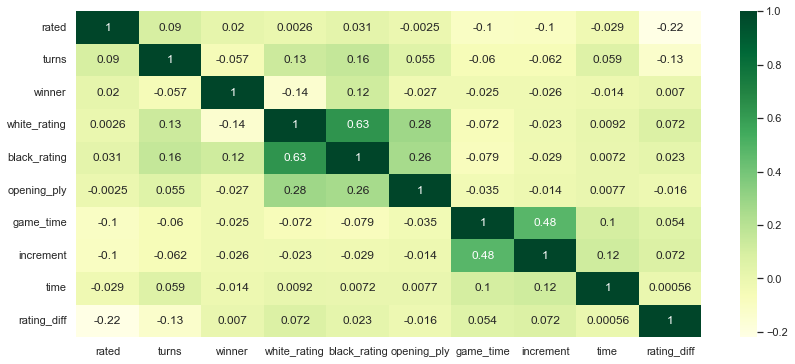

In [400]:
correlation = df_num.corr()
plt.figure(figsize = (14,6))
sns.heatmap(correlation , annot = True,cmap="YlGn") 

In [290]:
df_num.head(1)

,rated,turns,winner,white_rating,black_rating,opening_ply,game_time,increment,time,rating_diff
0,0,13,1,1500,1191,5,15,2,0,309


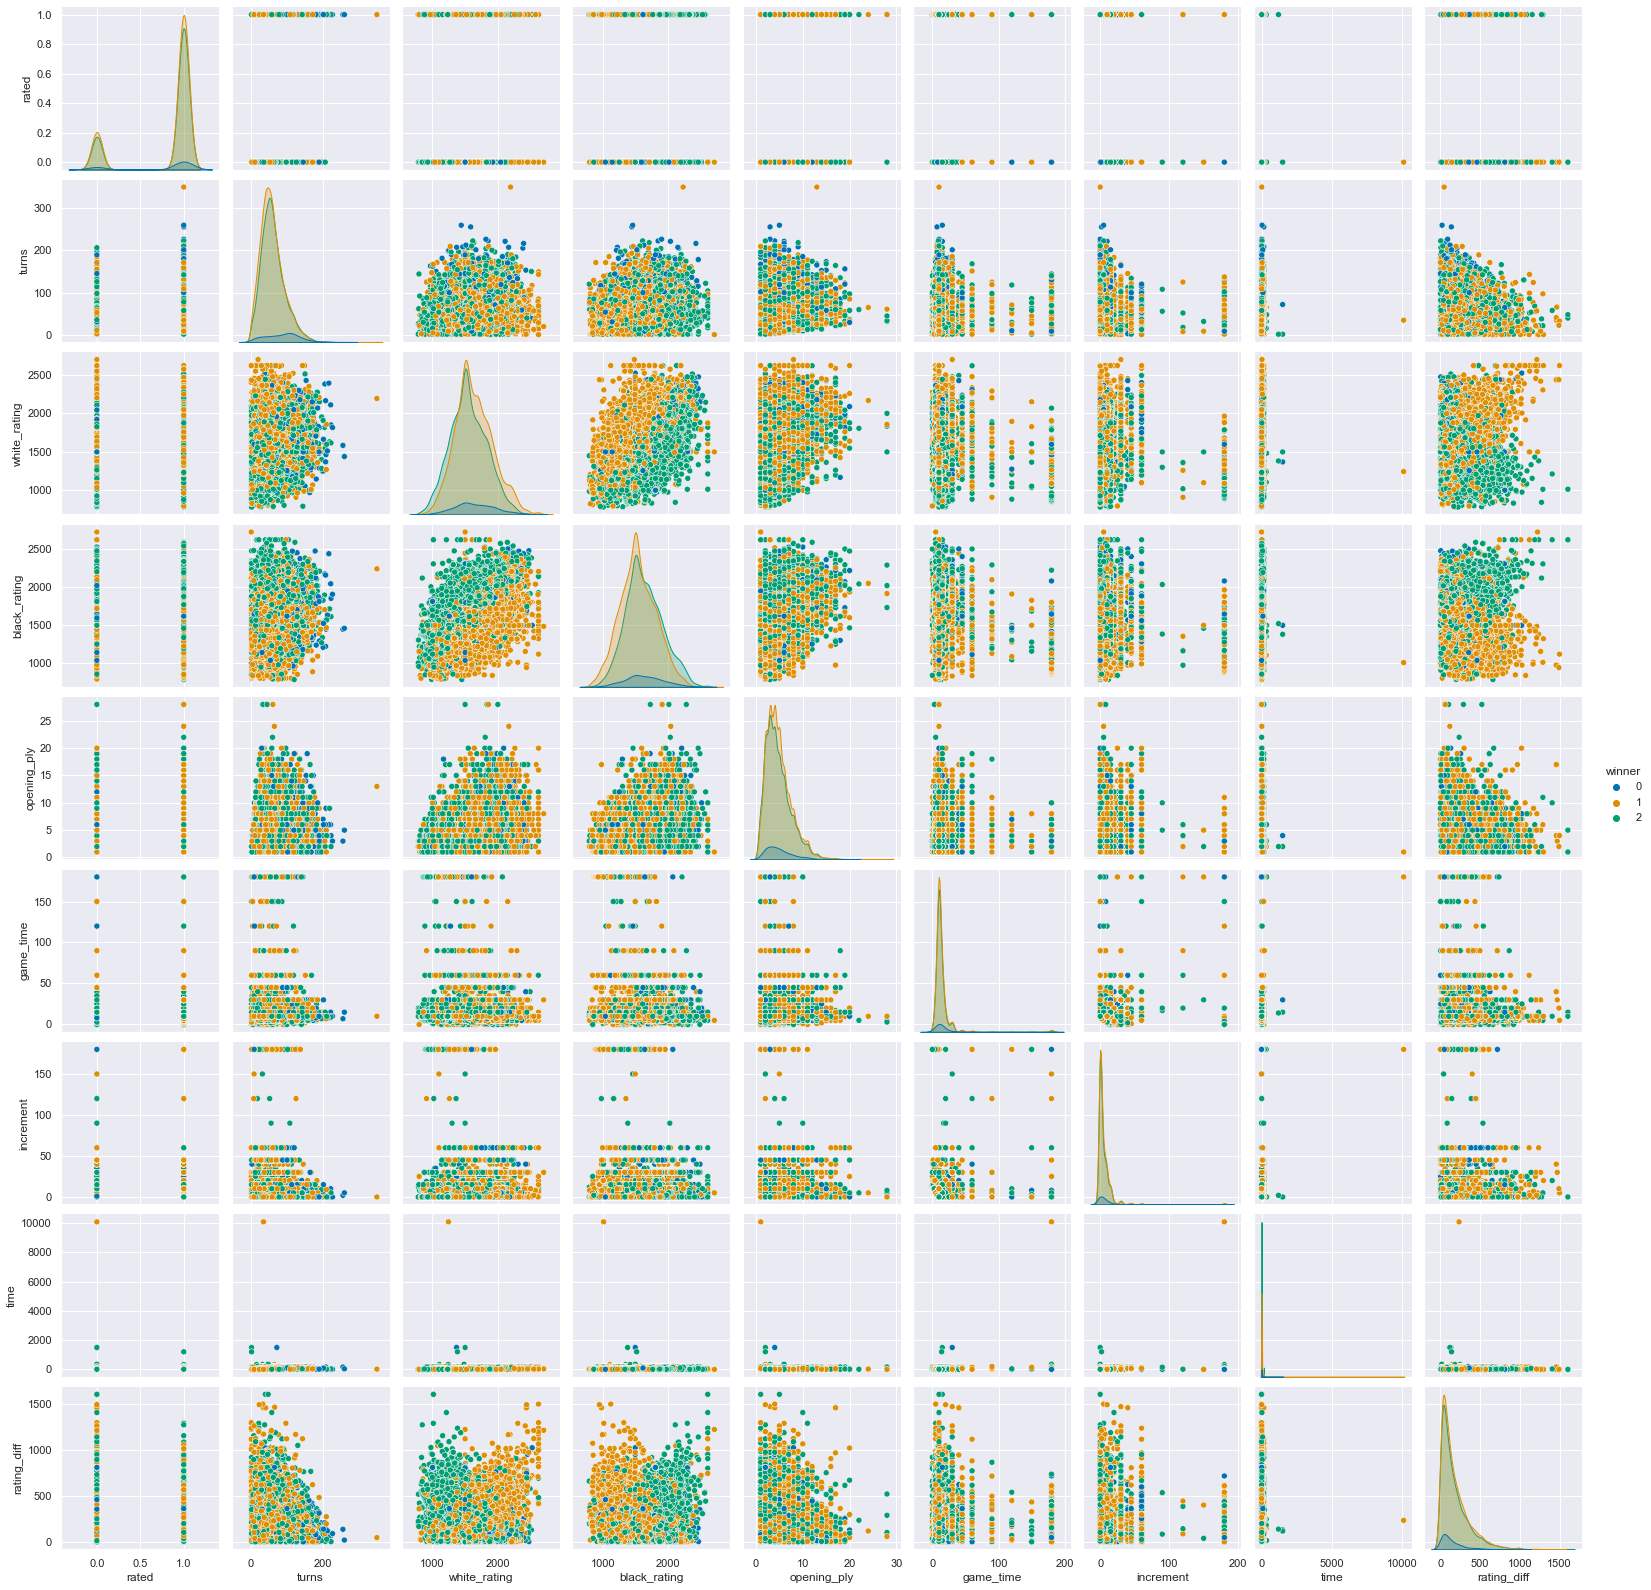

In [328]:
sns.pairplot(data=df_num,hue='winner',palette="colorblind")

In [293]:
# converting categorical data in dataframe for modelling usage the victory status and opening eco
df_dummies = pd.get_dummies(df2.drop(columns=['white_id','black_id'],axis=0))

 > i dropped the victory satus also , as this is something happened after the game , how to win is irrelevant to predicting the game winner. It's like saying some dead from the titanic how he died. 

In [294]:
df_dummies.head(3)

,rated,turns,winner,white_rating,black_rating,opening_ply,game_time,increment,time,rating_diff,...,opening_name_Van't Kruijs,opening_name_Vienna Game,opening_name_Wade Defense,opening_name_Ware Defense,opening_name_Ware Opening,opening_name_Yusupov-Rubinstein System,opening_name_Zukertort Opening,tier_low,tier_mid,tier_top
0,0,13,1,1500,1191,5,15,2,0,309,...,0,0,0,0,0,0,0,0,1,0
1,1,16,2,1322,1261,4,5,10,0,61,...,0,0,0,0,0,0,0,0,1,0
2,1,61,1,1496,1500,3,5,10,0,4,...,0,0,0,0,0,0,0,0,1,0


## Step 4 : Modelling

#### A. Logistic Regression

In [330]:
# now we train a simple classification model as base model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import MinMaxScaler

In [296]:
#let's first split the data  .
X = df_dummies.drop(columns=['winner'],axis=0)
y = df_dummies['winner']

In [297]:
X.shape,y.shape

((19629, 135), (19629,))

> We observed that there were some units gaps between each feature, therefore we should scale the data before modelling

In [298]:
scaler = MinMaxScaler()

In [299]:
X_scaled = scaler.fit_transform(X)

In [300]:
# split data into train and test

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=79)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15703, 135), (3926, 135), (15703,), (3926,))

> as we saw from the EDA , there is an imbalance between targets classifications . will you SMOTE to tackle the issue ~

In [302]:
from imblearn.over_sampling import SMOTE

In [303]:
sm = SMOTE(random_state=79)
X_train, y_train = sm.fit_resample(X_train, np.array(y_train))

In [305]:
lr_model = LogisticRegression(max_iter=800,random_state=79,solver='lbfgs').fit(X_train,y_train)

In [306]:
def score_model(X_test,y_test,model, name):
    print(f'{name:} accuracy score is {accuracy_score(y_test,model.predict(X_test)):.4f}')
    print(f"{name:} f1 score is {f1_score(y_test,model.predict(X_test),average='weighted'):.4f}")



> Defining function for repeated code for better readiblity

In [307]:
score_model(X_test,y_test,lr_model,"Logistics Regression")

Logistics Regression accuracy score is 0.6651
Logistics Regression f1 score is 0.6646


In [308]:
# creating a function to plot my models confusion matrixs~ 
from sklearn.metrics import confusion_matrix

def plot_conf_mx(X_test,y_test,model, name_conf):
    # confusioin matrix calculations
    conf_mtx = confusion_matrix(y_test, model.predict(X_test))
    cm_df = pd.DataFrame(conf_mtx,
                         index = ['Draw','Win','Lose'], 
                         columns = ['Draw','Win','Lose'])
    pd.set_option('float_format', '{:f}'.format)
    
    #Plotting the confusion matrix
    plt.figure(figsize=(8,5))

    sns.heatmap(np.round(cm_df),fmt='', annot=True,cmap="YlGn")
    plt.title(name_conf)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.savefig('conf_matrix.png')
    plt.show()


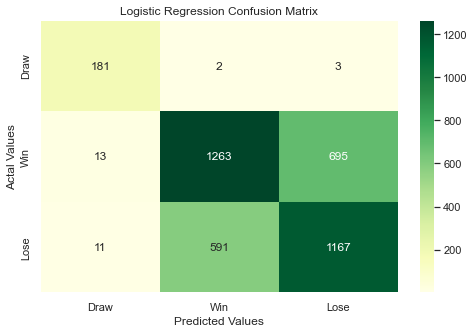

In [309]:
plot_conf_mx(X_test,y_test,lr_model,"Logistic Regression Confusion Matrix")

#### B. Random Forest

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [311]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [312]:
score_model(X_test,y_test,rf_model,"Random Forest")

Random Forest accuracy score is 0.6658
Random Forest f1 score is 0.6655


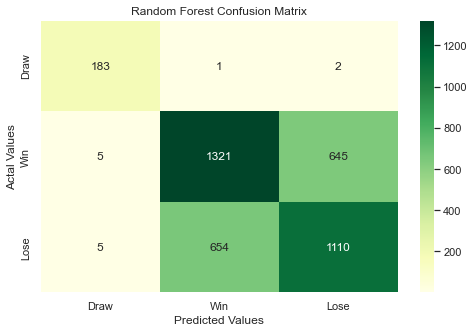

In [313]:
plot_conf_mx(X_test,y_test,rf_model,"Random Forest Confusion Matrix")

#### C. XGBoost

In [314]:
import xgboost as xgb

In [315]:
gbm = xgb.XGBClassifier(max_depth=10, 
                        n_estimators=400, 
                        learning_rate=0.05,
                        random_state=79, 
                        use_label_encoder=False,
                        eval_metric='mlogloss').fit(X_train,y_train)

In [316]:
score_model(X_test,y_test,gbm,"XGBoost")

XGBoost accuracy score is 0.8752
XGBoost f1 score is 0.8751


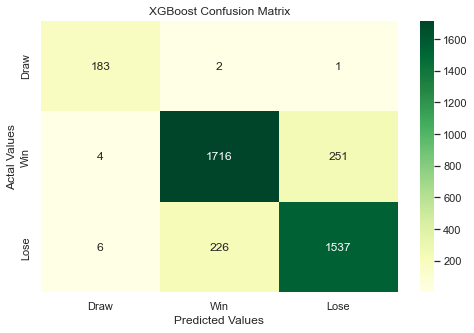

In [317]:
plot_conf_mx(X_test,y_test,gbm,"XGBoost Confusion Matrix")

#### D. SVM (Support Victor Machine

In [318]:
from sklearn.svm import SVC

In [319]:
svm = SVC(random_state=79).fit(X_train,y_train)

In [320]:
score_model(X_test,y_test,svm,"SVM")

SVM accuracy score is 0.6610
SVM f1 score is 0.6601


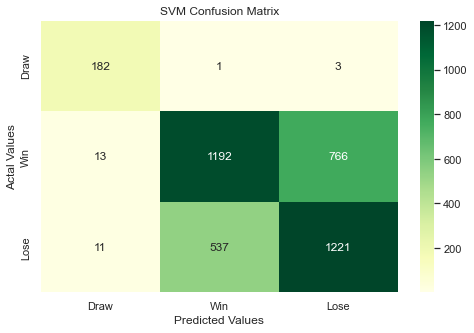

In [321]:
plot_conf_mx(X_test,y_test,svm,"SVM Confusion Matrix")

#### E. K- Nearest Neighbor

##### Since we are doing a distance algohrithm , we need to normalize the data 

In [322]:
from sklearn.neighbors import KNeighborsClassifier

In [323]:
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

In [324]:
score_model(X_test,y_test,knn_model,"K-Nearest Neighbor")

K-Nearest Neighbor accuracy score is 0.6118
K-Nearest Neighbor f1 score is 0.6106


In [325]:
# let's iterrate through a number of K's with possiblity to find Optimized K
knn_scores=[]
f1_scores=[]
for i in range(10):
   
    knn_model = KNeighborsClassifier(n_neighbors=i+1).fit(X_train,y_train)
    knn_y_pred =  knn_model.predict(X_test)
    knn_scores.append(accuracy_score(y_test,knn_y_pred))
    f1_scores.append(f1_score(y_test,knn_y_pred,average='weighted'))

print(f'Best number of neighbors for our KNN model is {knn_scores.index(max(knn_scores))+1:} with accuracy score {max(knn_scores):.4f} and f1 score of {f1_scores[knn_scores.index(max(knn_scores))]:.4f}' )

Best number of neighbors for our KNN model is 1 with accuracy score 0.6251 and f1 score of 0.6246


In [326]:
# so we fit the model again with 10 K-nearst neighbor. 
knn_model = KNeighborsClassifier(n_neighbors=1,n_jobs=-1).fit(X_train,y_train)
score_model(X_test,y_test,knn_model,"KNN")

KNN accuracy score is 0.6251
KNN f1 score is 0.6246


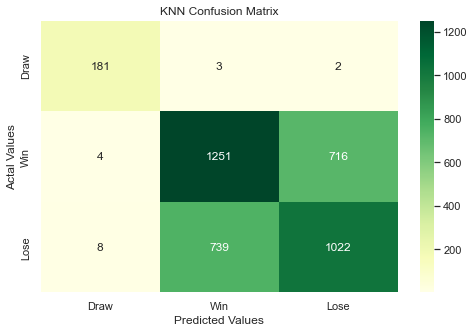

In [327]:
plot_conf_mx(X_test,y_test,knn_model,"KNN Confusion Matrix")

## Step 5:  Conclusion

   In light of the experiments we ran , we can observe that the XGBoost is the best model to predict the outcome of a chess match. The model score **87.5%** accuracy, and an f1 score of **87.5%** which is good for a sport match which involves a lot of calculation and strategic thinking.
Further tunning with the mentioned models proved that initial hyper parameters values are the best, given the limited resources at hands . 
